# 1.3 Método de *Newton-Raphson*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/1_Ecuaciones_de_una_variable/1.3_Metodo_de_Newton-Raphson.ipynb)

In [7]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Funciones en python

In [8]:
def graficar(f, x_i, x_f, num=1000):
        plt.style.use('seaborn')
        plt.ion()
        """
        Gráfica de funciones algebraicas
        :param f: función, previamente definida
        :param x_i: límite inferior del intervalo
        :param x_f: límite superior del intervalo
        :param num: división del intervalo
        :return: gráfica de la función
        """
        x = np.linspace(x_i, x_f, num)
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.plot(x, f(x))
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        #plt.show()
        
        return None

def met_newton_raphson(f, df, p_0, tol=1e-4, n=50, verbose=True, print_error=False, deploy_error=False):
        """
        Método de Newton-Rapphson
        :param f: Funcion a la que se le intenta encontrar una solucion
        para la ecuacion f(x)=0, previamente definida
        :param df: Derivada de la función
        :param p_0: semilla, valor inicial
        :param tol: toleracia, criterio de parada
        :param n: número máximo de iteraciones, criterio de parada
        :param verbose:
        :param print_error:
        :param deploy_error:
        :return: solución exacta o aproximada, si tiene.
        """
        i = 1
        lista_errores = list()
        while i <= n:
            if df(p_0) == 0:
                print('Solución no encontrada (df(x)=0)')
                return None

            p_i = p_0 - f(p_0) / df(p_0)
            e_abs = abs(p_0 - p_i)
            lista_errores.append(e_abs)
            if verbose:
                print(f'ite {i:<2}: p_{i - 1:<2} = {p_0:.4f}, p_{i:<2} = {p_i:.5f}'
                    f' | e_abs: {e_abs:e}')

            if f(p_i) == 0:
                if print_error:
                    print(f'error x iteración: {lista_errores}')
                print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                if deploy_error:
                    return lista_errores, p_i
                else:
                    return p_i

            if e_abs < tol:
                if print_error:
                    print(f'error x iteración: {lista_errores}')
                print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                if deploy_error:
                    return lista_errores, p_i
                else:
                    return p_i

            p_0 = p_i
            i += 1
        if print_error:
            print(f'error x iteración: {lista_errores}')
        print('solución no encontrada, iteraciones agotadas')
        return None    
    

El __método de newton__ (o de *Newton-Raphson*) es uno de los métodos numéricos más poderosos
y reconocidos para resolver un problema de encontrar la raíz. Existen muchas formas
de presentar el método de Newton.

## Método de newton

Si sólo a menudo se hace en cálculo. Otra posibilidad es derivar el método de Newton como una técnica para obtener convergencia más rápida de lo que ofrecen otros tipos de iteración funcional, como hacemos en la sección 2.4. Una tercera forma para presentar el método de Newton, que se analiza a continuación, está basada en los polinomios de Taylor. Ahí observaremos que esta forma particular no sólo produce el método, sino también una cota para el error de aproximación.

Suponga que $f∈ C^2[a, b]$. Si $p_0 ∈ [a, b]$ es una aproximación para $p$, de tal forma que $f'(p_0)\neq 0$ y $|p-p_0|$ es "pequeño". Considere que un primer polinimio de Taylor para $f(x)$ expendido alrededor de $p_0$ y evaluado en $x=p$:

\begin{equation}
f(p) = f(p_0) + (p − p_0) f'(p_0) + \frac{(p − p_0)^2}{2} f''(ξ(p))
\end{equation}

donde $ξ(p)$ se encuentra entre $p$ y $p_0$. Puesto que $f(p)=0$, esta ecuación nos da

\begin{equation}
0 = f(p_0) + (p − p_0) f'(p_0) + \frac{(p − p_0)^2}{2} f''(ξ(p))
\end{equation}

El método de Newton se deriva al suponer que como $|p−p_0|$ es pequeño, el término relacionado con $(p-p_0)^2$ es mucho más pequeño, entonces

\begin{equation}
0 ≈ f(p_0) + (p−p_0) f'(p0).
\end{equation}

Al resolver para p obtenemos

\begin{equation}
p ≈ p_0 − \frac{f(p_0)}{f'(p_0)}≡ p1.
\end{equation}

Esto constituye la base para el método de Newton, que empieza con una aproximación
inicial p0 y genera la sucesión $[pn]^∞_{n=0}$, mediante


\begin{equation}
p_n = p_{n-1} − \frac{f(p_{n-1})}{f'(p_{n-1})}, para **{n\geqq 1}**.
\end{equation}

Ahora, la ecuación de la recta tangente a la curva $y=f(x)$ que pasa por el punto $(p_0, f(p_0))$ tiene como pendiente $m=f '(p_0) y corresponde a

\begin{equation}
y = f'(p_0)x + [f(p_0) − f'(p_0)p_0]
\end{equation}

para calcular el cero de esta recta se reemplaza $y$ por cero

\begin{equation}
0 = f'(p_0)x + f(p_0) − f'(p_0)p_0
\end{equation}

y al despejar $x$, se tiene $x = p_0 − \frac {f(p_0)}{f'(p_0)}$. Dicho valor de x se nombra como $p_1$ y por tanto:

\begin{equation}
p_1 = p_0 − \frac {f(p_0)}{f'(p_0)}
\end{equation}

Si se repite el proceso, pero ahora con el punto $(p_1, f(p_1))$, se obtiene:

\begin{equation}
p_2 = p_1 − \frac {f(p_1)}{f'(p_1)}
\end{equation}

y finalmente, en la $n-ésima$ iteración

\begin{equation}
p_n = p_{n-1} − \frac {f(p_{n-1})}{f'(p_{n-1})}
\end{equation}


### El **método** explicado paso a paso:

**Paso 1:** Calcular la derivada $f'(x)$

**Paso 2:**  Evaluar $f(x)$ y $f'(x)$

**Paso 3:** Calcular la raíz aproximada:

$x_{i+1} = x_i - \frac {f(x)}{f'(x)}, f'(x_{i+1}) \neq0 $

que es la fórmula de iteración correspondiente al método de *Newton-Raphson*.

**Paso 4:** Calcular la raíz aproximada:

$e = |\frac{x_{i-1} - x_i}{x_{x-1}}|$


**Gráficamente  de puede interpretar el método de Newton-Raphson**

<img src="imagenes/mnewton.png"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*


**************************************


### Ejemplo práctico 1

Resolver la ecuación $e^x - 3sin(x) - 3x = 0$

1. Donde su semilla es $p_o$=2.5:


**Datos:**

$f(x) = e^x - 3sin(x) - 3x $

$f'(x) = e^x - 3cos(x) -3 $

$p_o = 2.5$


Aproximación = $10^{-5}$

**Procedimiento:**

*Paso 1:* Se recomienda graficar antes de empezar el calculo

*Paso 2:* Calcular $f'(x)$

*Paso 3:* Evaluar $f(x)$ y $f'(x)$

*Paso 4:* Calcular la raíz aproximada $x_{i+1}$:

\begin{equation}
x_{i+1} = x_i − \frac {f(x_i)}{f'(x_i)}
\end{equation}

*Paso 5:* Calcular el error:

\begin{equation}
e = |\frac {x_{i+1}-x_i}{x_{i+1}}|
\end{equation}

*Nota:* El procedimiento de los *Pasos del 2 al 5* se realizan ejecutando el *met_biseccion()*

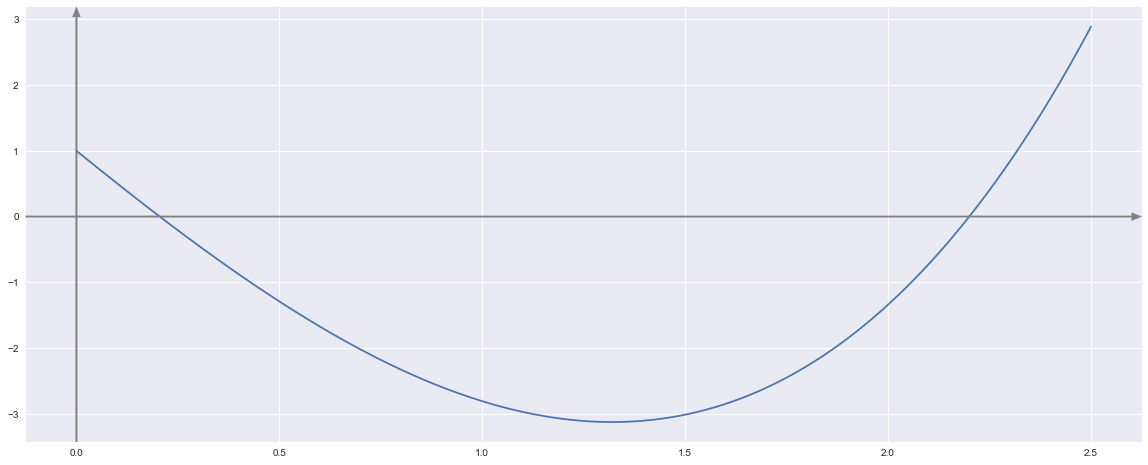

In [9]:
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
df = lambda x: np.e**x - 3*np.cos(x) - 3

graficar(f, 0, 2.5)


In [10]:
met_newton_raphson(f, df, 2.5, tol=1e-4, n=1000)

ite 1 : p_0  = 2.5000, p_1  = 2.25081 | e_abs: 2.491884e-01
ite 2 : p_1  = 2.2508, p_2  = 2.20186 | e_abs: 4.895282e-02
ite 3 : p_2  = 2.2019, p_3  = 2.20006 | e_abs: 1.795391e-03
ite 4 : p_3  = 2.2001, p_4  = 2.20006 | e_abs: 2.370571e-06
>>> Solución encontrada después de 4 iteraciones: x->2.200061060224872


2.200061060224872